<a href="https://colab.research.google.com/github/arjohar19/Data-Analyst/blob/main/Data_Analysis_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Buat Dataframe dan Mendeskripsikan Data Tersebut

In [ ]:
import pandas as pd
import numpy as np

#Load dataset, disini dataset dibuat manual
data = pd.DataFrame(
    {
        "Negara": ["Indosenia", "Malaysia", "Singapura", "Malaysia", "Thailand", None],
        "A": [1, 2, None, 2, 3, None],
        "B": [5, None, 7, None, None, None],
        "C": [99, 9, None, 9, 11, None],
        "D": [12, 8, 14, 8, 15, None]
    }
)

#Print Dataset yang sudah dibuat
print("Original Dataset")
print(data)

Original Dataset
      Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  NaN   9.0   8.0
2  Singapura  NaN  7.0   NaN  14.0
3   Malaysia  2.0  NaN   9.0   8.0
4   Thailand  3.0  NaN  11.0  15.0
5       None  NaN  NaN   NaN   NaN


Kemudian digunakan fungsi describe untuk memberikan informasi statistik deskriptif (count, mean, median, standar deviasi, nilai minimum dan maksimum, serta kuartil). Namun fungsi ini hanya bekerja pada data numerik.
Sebagai catatan tambahan, count menghitung berapa banyak data yang terdapat dalam satu kolom

In [ ]:
data.describe()

,A,B,C,D
count,4.000000,2.000000,4.000000,5.000000
mean,2.000000,6.000000,32.000000,11.400000
std,0.816497,1.414214,44.676616,3.286335
min,1.000000,5.000000,9.000000,8.000000
25%,1.750000,5.500000,9.000000,8.000000
50%,2.000000,6.000000,10.000000,12.000000
75%,2.250000,6.500000,33.000000,14.000000
max,3.000000,7.000000,99.000000,15.000000


# Missing Values

Dilakukan pemeriksaan berapa banyak jumlah data yang kosong pada tiap kolom dengan fungsi isnull()

In [ ]:
print("Missing values in the entire dataset")
print(data.isnull().sum())

Missing values in the entire dataset
Negara    1
A         2
B         4
C         2
D         1
dtype: int64


Dapat dilakukan identifikasi kolom mana saja yang memiliki nilai null

In [ ]:
print('Column with missing values')
print(data.columns[data.isnull().any()].tolist())

Column with missing values
['Negara', 'A', 'B', 'C', 'D']


# Handling Missing Values

Dilakukan handling data null dengan menghapus baris yang semua kolomnya berisi data null dengan fungsi dropna(). Sehingga terlihat di tabel bawah, indeks 5 tidak ada karena semua nilainya adalah data kosong

In [ ]:
drop_rows = data.dropna(how="all")
drop_rows

,Negara,A,B,C,D
0,Indosenia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,NaN,9.0,8.0
2,Singapura,NaN,7.0,NaN,14.0
3,Malaysia,2.0,NaN,9.0,8.0
4,Thailand,3.0,NaN,11.0,15.0


Dapat juga menghapus baris apapun yang memiliki nilai data null dengan fungsi dropna(). Sehingga hanya menghasilkan baris pertama karena tidak memiliki data null di tiap kolomnya.

In [ ]:
drop_rows2 = data.dropna(how='any')
drop_rows2

,Negara,A,B,C,D
0,Indosenia,1.0,5.0,99.0,12.0


Dapat juga menghapus kolom yang memiliki nilai null lebih dari atau sama dengan nilai batas tertentu. Dalam kasus ini, batas null adalah 4, sehingga kolom B menjadi hilang karena jumlah baris yang null adalah sebanyak 4 buah.

In [ ]:
drop_col = data.dropna(thresh = 4, axis='columns') #batas nan adalah 4 dan filter disetting pada kolom
drop_col

,Negara,A,C,D
0,Indosenia,1.0,99.0,12.0
1,Malaysia,2.0,9.0,8.0
2,Singapura,NaN,NaN,14.0
3,Malaysia,2.0,9.0,8.0
4,Thailand,3.0,11.0,15.0
5,None,NaN,NaN,NaN


Handling data dapat juga diisi dengan nilai tertentu. Dapat diisi nilai kosong atau null dengan fungsi fillna() pada library Pandas. Misal, kita ingin mengisi seluruh data kosong dengan nilai rerata atau mean masing-masing kolom sehingga keluarannya adalah sebagai berikut.

In [ ]:
fill_nan = data.fillna(
    {
        "A" : data["A"].mean(),
        "B" : data["B"].mean(),
        "C" : data["C"].mean(),
        "D" : data["D"].mean()
    }
)
fill_nan

,Negara,A,B,C,D
0,Indosenia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,6.0,9.0,8.0
2,Singapura,2.0,7.0,32.0,14.0
3,Malaysia,2.0,6.0,9.0,8.0
4,Thailand,3.0,6.0,11.0,15.0
5,None,2.0,6.0,32.0,11.4


Cara lain adalah diisi dengan backward-filled atau forward-filled, pada kasus ini dicoba pada kolom B dimana terlihat bahwa pada forward-filled, nilai kosong diisi oleh nilai setelahnya. Pada backward-filled, nilai kosong diisi oleh nilai sebelumnya.

In [ ]:
#Forward missing values in column B
data_imputed = data["B"].fillna(method="ffill")
print("Forward-filled column B")
print(data_imputed)

#Backward missing values ini column B
data_imputed2 = data["B"].fillna(method="bfill")
print("\nBackward-filled column B")
print(data_imputed2)

Forward-filled column B
0    5.0
1    5.0
2    7.0
3    7.0
4    7.0
5    7.0
Name: B, dtype: float64
Backward-filled column B
0    5.0
1    7.0
2    7.0
3    NaN
4    NaN
5    NaN
Name: B, dtype: float64


Dapat juga dilakukan interpolasi data dengan fungsi interpolate() sehingga seluruh data numerik yang nan diisi oleh nilai interpolasi masing masing kolom

In [ ]:
print("After Interpolate")
print(data.interpolate())

After Interpolate
      Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  6.0   9.0   8.0
2  Singapura  2.0  7.0   9.0  14.0
3   Malaysia  2.0  7.0   9.0   8.0
4   Thailand  3.0  7.0  11.0  15.0
5       None  3.0  7.0  11.0  15.0


#Data Duplicate

Dilakukan pemeriksaan data yang terduplikasi dengan fungsi duplicated()

In [ ]:
duplicates = data.duplicated()
data[duplicates]

,Negara,A,B,C,D
3,Malaysia,2.0,NaN,9.0,8.0


Selanjutnya, dilakukan penghapusan data duplicate dengan fungsi drop_duplicates()

In [ ]:
duplicated_data = data.drop_duplicates()
duplicated_data

,Negara,A,B,C,D
0,Indosenia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,NaN,9.0,8.0
2,Singapura,NaN,7.0,NaN,14.0
4,Thailand,3.0,NaN,11.0,15.0
5,None,NaN,NaN,NaN,NaN


Apabila ingin data terakhir saja yang diambil dari semua data duplikasi, maka

In [ ]:
duplicated_data2 = data.drop_duplicates(keep="last")
duplicated_data2

,Negara,A,B,C,D
0,Indosenia,1.0,5.0,99.0,12.0
2,Singapura,NaN,7.0,NaN,14.0
3,Malaysia,2.0,NaN,9.0,8.0
4,Thailand,3.0,NaN,11.0,15.0
5,None,NaN,NaN,NaN,NaN


#Typo

Bila diperhatikan, pada kolom “Negara” baris pertama terdapat typo ejaan, yaitu “Indosenia”. Kita dapat mengganti typo tersebut dengan fungsi replace()

In [ ]:
typo_data = data.copy()
typo_data["Negara"] = typo_data["Negara"].replace(["Indosenia"], "Indonesia")
typo_data

,Negara,A,B,C,D
0,Indonesia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,NaN,9.0,8.0
2,Singapura,NaN,7.0,NaN,14.0
3,Malaysia,2.0,NaN,9.0,8.0
4,Thailand,3.0,NaN,11.0,15.0
5,None,NaN,NaN,NaN,NaN


#Outlier

Dilakukan identifikasi data outlier menggunakan fungsi boxplot(). Terlihat di gambar di bawah terdapat satu nilai pada kolom C yang berada di luar boxplot.

<Axes: >

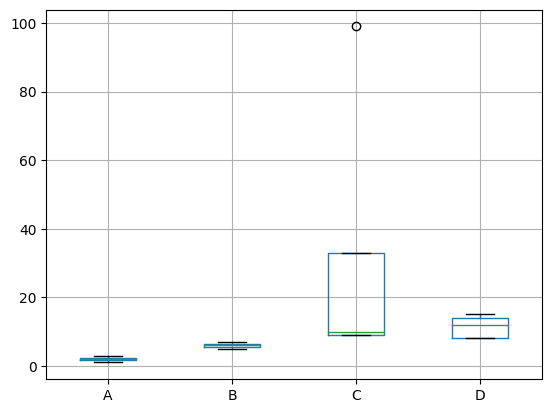

In [ ]:
boxplot = data.boxplot(column=['A', 'B', 'C', 'D'])
boxplot

# Handling Outlier

Salah satu metode yang sering digunakan untuk handling outlier adalah dengan metode IQR (Interquartil Range). Pertama dilakukan penghapusan baris yang semuanya berisi data kosong, lalu isi data yang kosong dengan nilai 0 (nol).

In [ ]:
fill_na = drop_rows.fillna({'A':0, 'B':0, 'C':0, 'D':0}) #mengambil hasil dari drop_rows yang sudah dilakukan di atas (scroll ke atas) yang menghilangkan baris yang semua kolomnya bernilai nan
fill_na

,Negara,A,B,C,D
0,Indosenia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,0.0,9.0,8.0
2,Singapura,0.0,7.0,0.0,14.0
3,Malaysia,2.0,0.0,9.0,8.0
4,Thailand,3.0,0.0,11.0,15.0


Kemudian dilakukan penentuan nilai quartile 1 dan quartile 3. Lalu dihitung IQR yaitu Q3-Q1

In [ ]:
Q1 = fill_na['C'].quantile(0.25)
Q3 = fill_na['C'].quantile(0.75)
IQR = Q3-Q1
print("IQR=",IQR)

IQR= 2.0


Dilakukan perhitungan handling outlier dengan metode IQR dengan rumus sebagai berikut

In [ ]:
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print("Upper Limit =", upper_limit)
print("Lower Limit =", lower_limit)

Upper Limit = 14.0
Lower Limit = 6.0


Kemudian dilakukan penghilangan data yang memiliki nilai di atas upper limit

In [ ]:
new_df = fill_na[fill_na['C'] < upper_limit]
new_df

,Negara,A,B,C,D
1,Malaysia,2.0,0.0,9.0,8.0
2,Singapura,0.0,7.0,0.0,14.0
3,Malaysia,2.0,0.0,9.0,8.0
4,Thailand,3.0,0.0,11.0,15.0


Dilakukan pemeriksaan kembali untuk memastikan apakah masih ada outlier terdeteksi di kolom C

<Axes: >

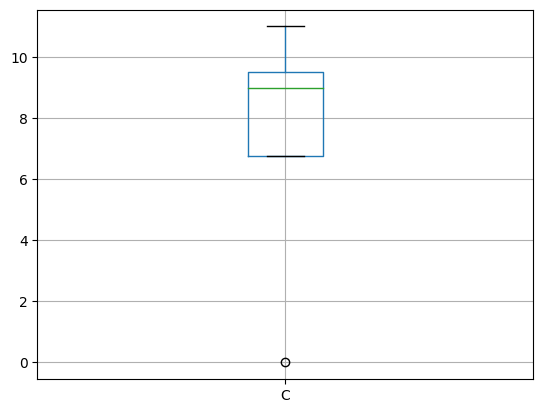

In [ ]:
boxplot2 = new_df.boxplot(column = ['C'])
boxplot2

Ternyata masih ada outlier baru, yaitu nilai 0. Oleh sebab itu digunakan cara lain dengan mengganti nilai yang berada di atas upper limit dengan nilai upper limit dan juga mengganti nilai yang berada di bawah lower limit dengan nilai lower limit.

In [ ]:
new_df_cap = fill_na.copy()
new_df_cap['C'] = np.where(
    new_df_cap['C'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['C'] < lower_limit,
        lower_limit,
        new_df_cap['C']
    )
)
new_df_cap

,Negara,A,B,C,D
0,Indosenia,1.0,5.0,14.0,12.0
1,Malaysia,2.0,0.0,9.0,8.0
2,Singapura,0.0,7.0,6.0,14.0
3,Malaysia,2.0,0.0,9.0,8.0
4,Thailand,3.0,0.0,11.0,15.0


Dilakukan pemeriksaan kembali apakah masih ada data outlier atau tidak

<Axes: >

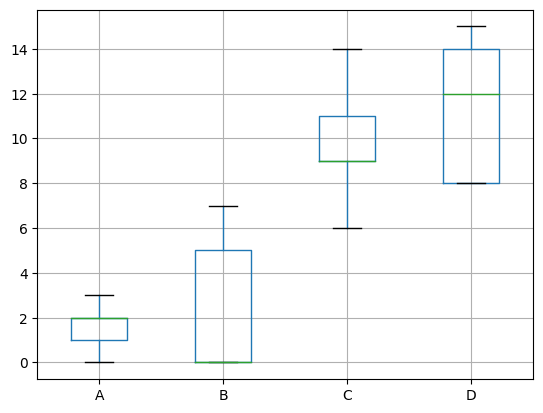

In [ ]:
boxplot3 = new_df_cap.boxplot(column=['A', 'B', 'C', 'D'])
boxplot3

Sudah tidak terlihat lagi data outlier yang berarti data sudah dapat untuk dilakukan analisis lebih lanjut.